### Data Pre-Processing

In [1]:
import re
import numpy as np
import pandas as pd
import string
import io
import codecs
from emot.emo_unicode import UNICODE_EMOJI
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('next-word-prediction/data/raw/medium_data.csv')

In [3]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [4]:
df['title'] = df['title'].str.replace(r'<[^<>]*>', '', regex=True) # removing html codes and clean it

In [5]:
out = '/next-word-prediction/data/medium/output.txt'

In [6]:
with open(out, "w") as f:
    f.write(" ".join(df["title"])) # saving the data as a text

### Load Data

In [7]:
def load_data(filename): # load again the text data
    with io.open(filename, 'r', encoding='utf8') as f:
        text = f.read()
    return text

In [8]:
emoji = list(UNICODE_EMOJI.keys()) # list of emojis that i found in data

In [9]:
def clean_file(doc):
    
    doc = doc.replace('--', ' ') # replace '--' with a space ' ' if any
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()] # remove remaining tokens that are not alphabetic
    # remove an emoji from text and change into lower
    tokens = [w for w in tokens if w not in emoji]
    tokens = [word.lower() for word in tokens]
    return tokens

In [10]:
path =  r'/next-word-prediction/data/medium/output.txt'
doc = load_data(path)

In [11]:
print(doc[:200])

A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model Hands-on Graph Neural Networks with PyTorch & PyTorch Geometric How to Use ggplot2 in Python Databricks: How to Save Files in CSV on You


In [12]:
tokens = clean_file(doc)
#tokens = doc
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['a', 'guide', 'to', 'word', 'embedding', 'with', 'gensim', 'model', 'handson', 'graph', 'neural', 'networks', 'with', 'pytorch', 'pytorch', 'geometric', 'how', 'to', 'use', 'in', 'python', 'databricks', 'how', 'to', 'save', 'files', 'in', 'csv', 'on', 'your', 'local', 'computer', 'a', 'stepbystep', 'implementation', 'of', 'gradient', 'descent', 'and', 'backpropagation', 'an', 'easy', 'introduction', 'to', 'sql', 'for', 'data', 'scientists', 'hypothesis', 'testing', 'visualized', 'introduction', 'to', 'latent', 'matrix', 'factorization', 'recommender', 'systems', 'which', 'candidate', 'is', 'the', 'best', 'at', 'twitter', 'what', 'if', 'ai', 'model', 'understanding', 'were', 'easy', 'what', 'i', 'learned', 'from', 'twotime', 'kaggle', 'grandmaster', 'abhishek', 'thakur', 'making', 'a', 'bot', 'using', 'ml', 'building', 'a', 'chrome', 'extension', 'how', 'to', 'teach', 'code', 'reinventing', 'personalization', 'for', 'customer', 'experience', 'how', 'to', 'automate', 'hyperparameter', '

# **SOME EDA (Exploratory Data Analysis)**

In [8]:

df.describe(include=object).T.style.background_gradient(subset=["count"], cmap="Purples")

,count,unique,top,freq
url,6508,6508,https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92,1
title,6508,6504,Lost in translation,2
subtitle,3479,3470,"A weekly selection of design links, brought to you by your friends at the UX Collective.",5
image,6361,6361,1.png,1
responses,6508,56,0,3396
publication,6508,7,The Startup,3041
date,6508,50,21-10-2019,197


In [9]:
df.describe().T.style.background_gradient(cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
id,6508.000000,3254.500000,1878.842108,1.000000,1627.750000,3254.500000,4881.250000,6508.000000
claps,6508.000000,311.076060,950.789896,0.000000,54.000000,115.000000,268.250000,38000.000000
reading_time,6508.000000,6.134911,3.231918,0.000000,4.000000,5.000000,7.000000,55.000000


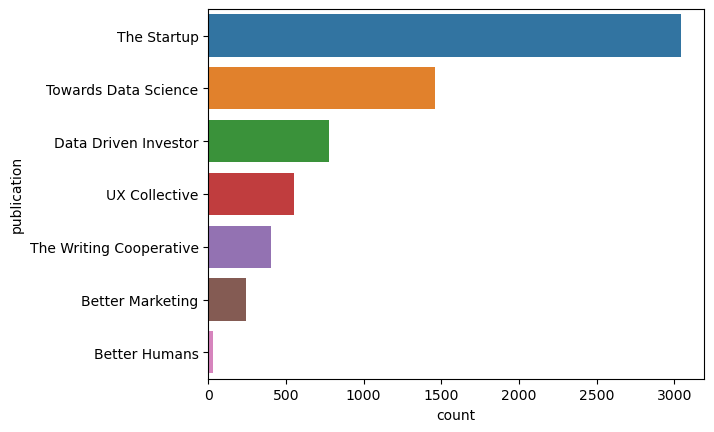

In [12]:

sns.countplot(y="publication", data=md, order=md['publication'].value_counts().index)
plt.show()

In [11]:
#number of articles of each publication
pubs_articles_count = df.publication.value_counts().rename_axis('publications').reset_index(name='counts')
pubs_articles_count

,publications,counts
0,The Startup,3041
1,Towards Data Science,1461
2,Data Driven Investor,778
3,UX Collective,555
4,The Writing Cooperative,403
5,Better Marketing,242
6,Better Humans,28


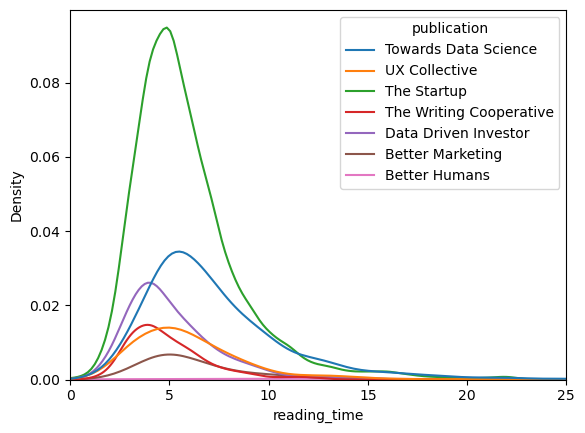

In [13]:
sns.kdeplot(x="reading_time", hue="publication", data=df)
plt.xlim(0,25)
plt.show()

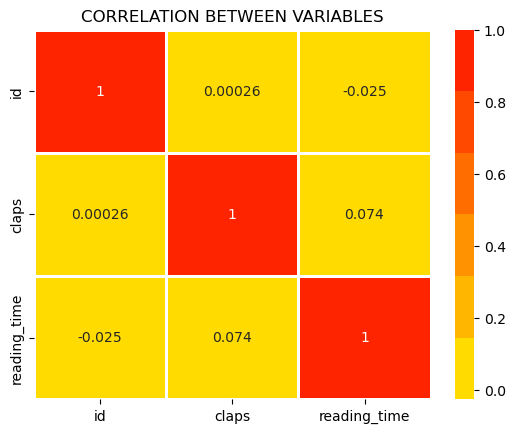

In [14]:
correlation = df.corr()
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("autumn_r"),
            linewidth=2,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [13]:
# organize into sequences of tokens
length = 5 + 1 # for unigram
sequences = list()
for i in range(length, len(tokens)):
	# select sequence of tokens
	seq = tokens[i-length:i]
	# convert into a line
	line = ' '.join(seq)
	# store
	sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 48544


In [14]:
sequences

['a guide to word embedding with',
 'guide to word embedding with gensim',
 'to word embedding with gensim model',
 'word embedding with gensim model handson',
 'embedding with gensim model handson graph',
 'with gensim model handson graph neural',
 'gensim model handson graph neural networks',
 'model handson graph neural networks with',
 'handson graph neural networks with pytorch',
 'graph neural networks with pytorch pytorch',
 'neural networks with pytorch pytorch geometric',
 'networks with pytorch pytorch geometric how',
 'with pytorch pytorch geometric how to',
 'pytorch pytorch geometric how to use',
 'pytorch geometric how to use in',
 'geometric how to use in python',
 'how to use in python databricks',
 'to use in python databricks how',
 'use in python databricks how to',
 'in python databricks how to save',
 'python databricks how to save files',
 'databricks how to save files in',
 'how to save files in csv',
 'to save files in csv on',
 'save files in csv on your',
 'fi

In [15]:
# save tokens to file, one dialog per line
def save_file(lines, filename):
	data = '\n'.join(lines)
	file = open(filename, 'w', encoding='utf8')
	file.write(data)
	file.close()

In [16]:
outfile = '/next-word-prediction/data/final/data5.txt'
save_file(sequences, outfile)

**Now, we have the cleaned data in the 'data5.txt' text file, and we will work on the modelling in the next notebook. 
Thank you!**